<a href="https://colab.research.google.com/github/GuilhermeBorba2/Series-Temporais/blob/main/SeriesTemporaisSarimax_VarExogenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install scipy
!pip install pmdarima
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.io.sql import DatabaseError
import statsmodels.api as sm
import statsmodels.formula.api as smf
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
preco = pd.read_csv('/content/gdrive/MyDrive/pasta_estudo /price.csv')

In [6]:
preco.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000


In [7]:
preco["Mean"] = (preco["Low"]+ preco["High"])/2
preco.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393


In [8]:
dataset = preco

In [9]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Mean
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964
3,2008-10-06,3.284286,3.527857,3.126429,3.505000,2.992681,2107417200,3.327143
4,2008-10-07,3.588571,3.625000,3.176786,3.184286,2.718845,1878772000,3.400893


In [10]:
steps = -1
dataset_for_prediction = dataset.copy()
dataset_for_prediction ["Actual"]=dataset_for_prediction["Mean"].shift(steps)
dataset_for_prediction.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume,Mean,Actual
0,2008-10-01,3.997143,4.012857,3.835357,3.897143,3.327505,1296484000,3.924107,3.728393
1,2008-10-02,3.857500,3.885357,3.571429,3.575000,3.052449,1609364400,3.728393,3.591964
2,2008-10-03,3.714286,3.803571,3.380357,3.466786,2.960053,2294398400,3.591964,3.327143


In [11]:
dataset_for_prediction = dataset_for_prediction.dropna()

In [12]:
dataset_for_prediction["Date"] = pd.to_datetime(dataset_for_prediction["Date"])
dataset_for_prediction.index = dataset_for_prediction["Date"] 

<Axes: xlabel='Date'>

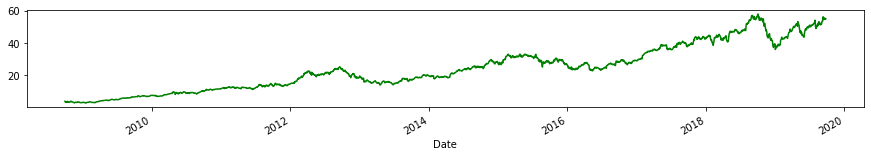

In [13]:
dataset_for_prediction["Mean"].plot(color="green", figsize=(15,2))

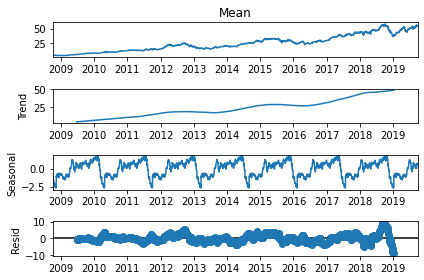

In [15]:
sd = sm.tsa.seasonal_decompose(dataset_for_prediction["Mean"], model="add", period=365);
fig=sd.plot()
plt.show()

In [20]:
se_in = MinMaxScaler(feature_range=(0,1))
scaled_input = se_in.fit_transform(dataset_for_prediction[["Low","High","Open", "Close", "Volume","Adj Close","Mean"]])
scaled_input = pd.DataFrame(scaled_input)
X=scaled_input

In [17]:
se_in = MinMaxScaler(feature_range=(0,1))
scaled_output = se_in.fit_transform(dataset_for_prediction[["Actual"]])
scaled_output = pd.DataFrame(scaled_output)
Y=scaled_output

In [25]:
X.rename(columns={0:"Low",1:"High",2:"Open",3:"Close",4:"Volume",5:"Adj Close",6:"Mean"}, inplace=True)
X.index=dataset_for_prediction.index
X.head(2)


,Low,High,Open,Close,Volume,Adj Close,Mean
Date,,,,,,,
2008-10-01,0.019075,0.019558,0.021177,0.019996,0.556275,0.01762,0.019318
2008-10-02,0.014246,0.017258,0.018632,0.014163,0.695398,0.01248,0.015763


In [26]:
Y.rename(columns={0:"Preco_acao"}, inplace=True)
Y.index=dataset_for_prediction.index
Y.head(2)

,Preco_acao
Date,
2008-10-01,0.015763
2008-10-02,0.013284


In [55]:
train_size=int(len(dataset) *0.7)
test_size = int(len(dataset)) - train_size
train_X, train_Y = X[:train_size].dropna(), Y[:train_size].dropna()
test_X, test_Y = X[train_size:].dropna(), Y[train_size:].dropna()

In [56]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_Y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action="ignore", 
 suppress_warnings=True, 
 stepwise=True)
                     

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-15130.709, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15077.042, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-15127.374, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-15132.095, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15075.928, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-15130.986, Time=0.81 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-15130.275, Time=2.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-15131.797, Time=0.48 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.750 seconds


In [57]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1936
Model:               SARIMAX(0, 1, 1)   Log Likelihood                7569.047
Date:                Tue, 21 Mar 2023   AIC                         -15132.095
Time:                        01:37:53   BIC                         -15115.391
Sample:                             0   HQIC                        -15125.952
                               - 1936                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      1.414      0.157    -7.4e-05       0.000
ma.L1          0.1723      0.013     13.155      0.000       0.147       0.198
sigma2      2.339e-05   3.08e-07     75.974      0.000    2.28e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9198.02
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               8.10   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_Y, 
 exog=train_X,
 order=(0,1,1),
 enforce_invertibility=False, enforce_stationarity=False)


In [60]:
results=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [61]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

In [65]:
act = pd.DataFrame(scaled_output.iloc[train_size:, 0])
act.index = test_X.index
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['Actual'] = act["Preco_acao"]
predictions.rename(columns={0:'Pred'}, inplace=True)

<Axes: xlabel='Date'>

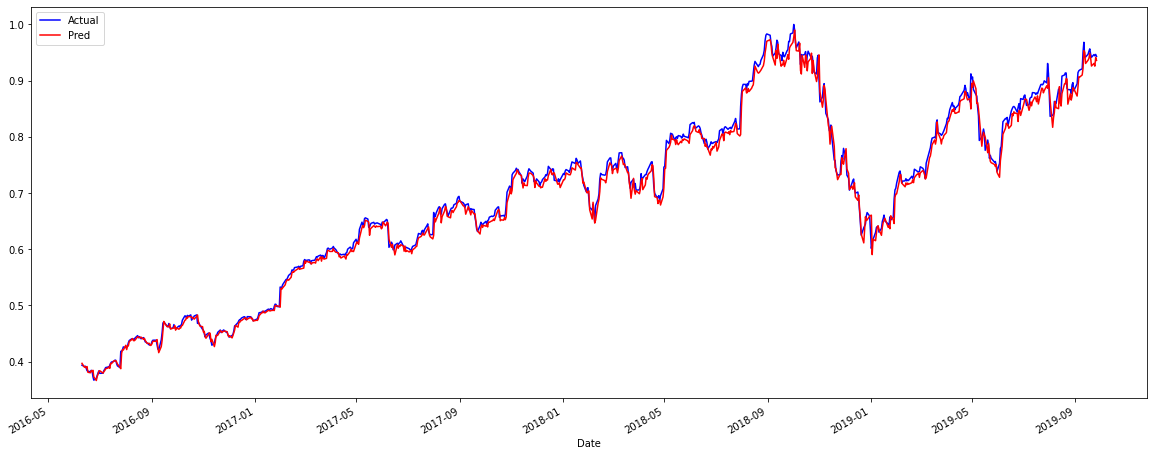

In [66]:
predictions["Actual"].plot(figsize=(20,8), legend=True, color ="blue")
predictions["Pred"].plot(legend=True, color="red", figsize=(20,8))


In [68]:
from statsmodels.tools.eval_measures import rmse

In [71]:
error= rmse(predictions["Pred"], predictions["Actual"])
error



0.011756449988773622